In [ ]:
!pip install torch torchvision fiftyone pillow numpy opencv-python tqdm scikit-image matplotlib --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 101.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.2/308.2 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 15.3 MB/s eta

In [ ]:
import os
import random
import glob
import numpy as np
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import transforms as T
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

In [ ]:
import fiftyone.zoo as foz
os.makedirs("./data", exist_ok=True)
print("Downloading / loading OpenImages subset (may already exist)...")
dataset_meta = foz.load_zoo_dataset("open-images-v6", split="validation", max_samples=1000)
print("Downloaded:", len(dataset_meta), "items (FiftyOne-managed directory)")

/usr/local/lib/python3.12/dist-packages/glob2/fnmatch.py:141: SyntaxWarning: invalid escape sequence '\Z'
  return '(?ms)' + res + '\Z'


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/open-images-v6/validation' if necessary


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/validation/validation-images-with-rotation.csv' to '/root/fiftyone/open-images-v6/validation/metadata/image_ids.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv' to '/root/fiftyone/open-images-v6/validation/metadata/classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v6/oidv6-attributes-description.csv' to '/root/fiftyone/open-images-v6/validation/metadata/attributes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/classes-segmentation.txt' to '/root/fiftyone/open-images-v6/validation/metadata/segmentation_classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy.json' to '/tmp/tmpjbx8e73p/metadata/hierarchy.json'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/validation-annotations-human-imagelabels-boxable.csv' to '/root/fiftyone/open-images-v6/validation/labels/classifications.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/validation-annotations-bbox.csv' to '/root/fiftyone/open-images-v6/validation/labels/detections.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v6/oidv6-validation-annotations-vrd.csv' to '/root/fiftyone/open-images-v6/validation/labels/relationships.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/validation-annotations-object-segmentation.csv' to '/root/fiftyone/open-images-v6/validation/labels/segmentations.csv'


INFO:fiftyone.utils.openimages:Downloading 1000 images


 100% |█████████████████| 1000/1000 [2.2m elapsed, 0s remaining, 7.1 files/s]       


INFO:eta.core.utils: 100% |█████████████████| 1000/1000 [2.2m elapsed, 0s remaining, 7.1 files/s]       


Dataset info written to '/root/fiftyone/open-images-v6/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/open-images-v6/info.json'


Loading 'open-images-v6' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v6' split 'validation'


 100% |███████████████| 1000/1000 [31.2s elapsed, 0s remaining, 60.6 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [31.2s elapsed, 0s remaining, 60.6 samples/s]      


Dataset 'open-images-v6-validation-1000' created


INFO:fiftyone.zoo.datasets:Dataset 'open-images-v6-validation-1000' created


Downloaded: 1000 items (FiftyOne-managed directory)


In [ ]:
paths = glob.glob("/root/fiftyone/open-images-v6/**/*.jpg", recursive=True)
if len(paths) == 0:
    paths = glob.glob("./data/**/*.jpg", recursive=True)
assert len(paths) > 0, "No images found; please verify dataset path"
DATA_DIR = os.path.dirname(paths[0])
print("Using DATA_DIR =", DATA_DIR)


Using DATA_DIR = /root/fiftyone/open-images-v6/validation/data


In [ ]:
class ImageFolderDataset(Dataset):
    def __init__(self, root, image_size=256, max_samples=None):
        exts = ("jpg", "jpeg", "png")
        p = []
        for e in exts:
            p += glob.glob(os.path.join(root, f"**/*.{e}"), recursive=True)
        if max_samples:
            p = p[:max_samples]
        self.paths = p
        self.transform = T.Compose([T.Resize((image_size, image_size)), T.ToTensor()])
    def __len__(self): return len(self.paths)
    def __getitem__(self, idx):
        img = Image.open(self.paths[idx]).convert("RGB")
        return self.transform(img)

In [ ]:
IMG_SIZE = 256
MAX_SAMPLES = 1000
BATCH = 4

dataset = ImageFolderDataset(DATA_DIR, image_size=IMG_SIZE, max_samples=MAX_SAMPLES)
n = len(dataset)
print("Found images:", n)

Found images: 1000


In [ ]:
train_idx = list(range(int(0.8 * n)))
val_idx = list(range(int(0.8 * n), n))
train_ds = Subset(dataset, train_idx)
val_ds = Subset(dataset, val_idx)
train_loader = DataLoader(train_ds, batch_size=BATCH, shuffle=True, num_workers=2)
val_loader = DataLoader(val_ds, batch_size=BATCH, shuffle=False, num_workers=2)
print("Train:", len(train_ds), "Val:", len(val_ds))

Train: 800 Val: 200


In [ ]:
def conv_block(in_c, out_c, k=3, s=1, p=1):
    return nn.Sequential(
        nn.Conv2d(in_c, out_c, k, s, p),
        nn.BatchNorm2d(out_c),
        nn.ReLU(inplace=True)
    )

In [ ]:
class UNetHiding(nn.Module):
    def __init__(self, base=64):
        super().__init__()
        self.enc1 = nn.Sequential(conv_block(3, base), conv_block(base, base))
        self.pool = nn.AvgPool2d(2)
        self.enc2 = nn.Sequential(conv_block(base, base*2), conv_block(base*2, base*2))
        self.enc3 = nn.Sequential(conv_block(base*2, base*4), conv_block(base*4, base*4))
        self.bott = nn.Sequential(conv_block(base*4, base*8), conv_block(base*8, base*8))
        self.up3 = nn.ConvTranspose2d(base*8, base*4, 2, 2)
        self.dec3 = nn.Sequential(conv_block(base*8, base*4), conv_block(base*4, base*4))
        self.up2 = nn.ConvTranspose2d(base*4, base*2, 2, 2)
        self.dec2 = nn.Sequential(conv_block(base*4, base*2), conv_block(base*2, base*2))
        self.up1 = nn.ConvTranspose2d(base*2, base, 2, 2)
        self.dec1 = nn.Sequential(conv_block(base*2, base), conv_block(base, base))
        self.out = nn.Sequential(nn.Conv2d(base, 3, 1), nn.Tanh())

    def forward(self, x):
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool(e1))
        e3 = self.enc3(self.pool(e2))
        b  = self.bott(self.pool(e3))
        d3 = self.dec3(torch.cat([self.up3(b), e3],1))
        d2 = self.dec2(torch.cat([self.up2(d3), e2],1))
        d1 = self.dec1(torch.cat([self.up1(d2), e1],1))
        return self.out(d1)

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, ch):
        super().__init__()
        self.net = nn.Sequential(conv_block(ch,ch), conv_block(ch,ch))
    def forward(self,x): return F.relu(x + self.net(x))

In [ ]:
class RevealingNet(nn.Module):
    def __init__(self, base=64, n_res=5, selected_channels_mask=None):
        super().__init__()
        self.base = base
        self.down1 = conv_block(3, base)
        self.down2 = conv_block(base, base*2)
        self.res   = nn.Sequential(*[ResidualBlock(base*2) for _ in range(n_res)])
        self.up    = nn.ConvTranspose2d(base*2, base, 2, 2)
        if selected_channels_mask is None:
            self.selector = None
        else:
            mask = torch.tensor(selected_channels_mask, dtype=torch.float32).view(1, -1, 1, 1)
            self.register_buffer("channel_mask", mask)
            self.selector = True
        self.out   = nn.Sequential(conv_block(base,3), nn.Sigmoid())

    def forward(self,x):
        d1 = self.down1(x)
        d2 = self.down2(F.avg_pool2d(d1,2))
        r  = self.res(d2)
        if getattr(self, "selector", None):
            r = r * self.channel_mask
        u  = self.up(r)
        return self.out(u)

In [ ]:
class AttackModule:
    """
    Multi-tamper classical Attack Module:
    Includes random patch, copy-move, inpainting, splicing, JPEG, color shift.
    Fully batch-safe (works with batch_size=1 upwards).
    """

    def __init__(self):
        pass

    # ---------------------
    # Utility conversions
    # ---------------------
    def to_uint8(self, img_tensor):
        arr = (img_tensor.detach().permute(1,2,0).cpu().numpy() * 255).astype(np.uint8)
        return arr

    def to_tensor(self, arr):
        return torch.tensor(arr.astype(np.float32) / 255.).permute(2,0,1)

    # ---------------------
    # TAMPER TYPES
    # ---------------------
    def random_patch(self, img):
        """Replace random region with random noise."""
        B,C,H,W = img.shape
        out = img.clone()
        mask = torch.zeros(B,1,H,W)

        for i in range(B):
            x,y = random.randint(0,W//2), random.randint(0,H//2)
            w,h = random.randint(W//6,W//3), random.randint(H//6,H//3)

            out[i,:,y:y+h,x:x+w] = torch.rand_like(out[i,:,y:y+h,x:x+w])
            mask[i,0,y:y+h,x:x+w] = 1

        return out, mask


    def copy_move(self, img):
        """Copy one region to another region within same image."""
        B,C,H,W = img.shape
        out = img.clone()
        mask = torch.zeros(B,1,H,W)

        for i in range(B):
            sx,sy = random.randint(0,W//2), random.randint(0,H//2)
            sw,sh = random.randint(W//6,W//3), random.randint(H//6,H//3)
            tx,ty = random.randint(0,W//2), random.randint(0,H//2)

            patch = out[i,:,sy:sy+sh,sx:sx+sw]
            out[i,:,ty:ty+sh,tx:tx+sw] = patch
            mask[i,0,ty:ty+sh,tx:tx+sw] = 1

        return out, mask


    def splice_from_other(self, batch_img):
        """Paste a region from another image in the same batch (splicing)."""
        B,C,H,W = batch_img.shape
        out = batch_img.clone()
        mask = torch.zeros(B,1,H,W)

        # random permutation to select donor images
        idx = torch.randperm(B)

        for i in range(B):
            donor = batch_img[idx[i]]

            x,y = random.randint(0,W//2), random.randint(0,H//2)
            w,h = random.randint(W//6,W//3), random.randint(H//6,H//3)

            out[i,:,y:y+h,x:x+w] = donor[:,y:y+h,x:x+w]
            mask[i,0,y:y+h,x:x+w] = 1

        return out, mask


    def inpaint(self, img):
        """Remove an object-like region using classical inpainting."""
        B,C,H,W = img.shape
        out = img.clone()
        mask = torch.zeros(B,1,H,W)

        for i in range(B):
            arr = self.to_uint8(img[i])
            m = np.zeros((H,W), dtype=np.uint8)

            x,y = random.randint(0,W//2), random.randint(0,H//2)
            w,h = random.randint(W//6,W//3), random.randint(H//6,H//3)
            m[y:y+h,x:x+w] = 255

            inp = cv2.inpaint(arr, m, 7, cv2.INPAINT_TELEA)
            out[i] = self.to_tensor(inp)
            mask[i,0,y:y+h,x:x+w] = 1

        return out, mask


    def strong_jpeg(self, img):
        """Apply strong JPEG compression."""
        B,C,H,W = img.shape
        out = img.clone()

        for i in range(B):
            arr = self.to_uint8(img[i])
            q = random.randint(10,30)
            _,enc = cv2.imencode(".jpg", cv2.cvtColor(arr, cv2.COLOR_RGB2BGR),
                                 [int(cv2.IMWRITE_JPEG_QUALITY), q])
            dec = cv2.cvtColor(cv2.imdecode(enc, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
            out[i] = self.to_tensor(dec)

        return out


    def color_shift(self, img):
        """Apply color shift (hue rotation)."""
        B,C,H,W = img.shape
        out = img.clone()

        for i in range(B):
            arr = self.to_uint8(img[i])
            hsv = cv2.cvtColor(arr, cv2.COLOR_RGB2HSV)
            hsv[:,:,0] = (hsv[:,:,0] + random.randint(5,25)) % 180
            out[i] = self.to_tensor(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB))

        return out


    # ---------------------
    # MAIN CALL
    # ---------------------
    def __call__(self, container):
        B,C,H,W = container.shape
        tampered = container.clone()
        mask     = torch.zeros(B,1,H,W)

        for i in range(B):
            r = random.random()

            # STRUCTURAL TAMPERS
            if r < 0.25:
                t, m = self.random_patch(container[i:i+1])
            elif r < 0.50:
                t, m = self.copy_move(container[i:i+1])
            elif r < 0.75:
                t, m = self.inpaint(container[i:i+1])
            else:
                t, m = self.splice_from_other(container)

            # Apply tamper result to batch
            tampered[i] = t[0]
            mask[i]     = m[0]

        # Apply photometric distortions last (no mask needed)
        tampered = self.color_shift(tampered)
        tampered = self.strong_jpeg(tampered)

        return tampered, mask

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
hider = UNetHiding().to(device)
revealer = RevealingNet().to(device)
attack = AttackModule()

opt = torch.optim.Adam(list(hider.parameters()) + list(revealer.parameters()), lr=1e-4)
mse = nn.MSELoss()

In [ ]:
def psnr(a,b):
    mse_val = torch.mean((a-b)**2)
    return 20 * torch.log10(1.0 / torch.sqrt(mse_val + 1e-12))

In [ ]:
EPOCHS = 3
print("Baseline training...")
for epoch in range(EPOCHS):
    hider.train(); revealer.train()
    total = 0
    for imgs in tqdm(train_loader):
        imgs = imgs.to(device)
        secrets = imgs[torch.randperm(len(imgs))]
        wm = hider(secrets)
        container = torch.clamp(imgs + 0.5*(wm+1),0,1)
        tampered, mask = attack(container); tampered, mask = tampered.to(device), mask.to(device)
        ret = revealer(tampered)

        masked_secret = secrets*(1-mask)
        loss_hide = mse(container, imgs)
        loss_reveal = mse(ret*(1-mask), masked_secret)
        loss = loss_hide + 0.75*loss_reveal

        opt.zero_grad(); loss.backward(); opt.step()
        total += loss.item()
    print("Epoch:", epoch+1, "Loss:", total/len(train_loader))

Baseline training...


100%|██████████| 200/200 [01:18<00:00,  2.56it/s]


Epoch: 1 Loss: 0.1361483858898282


100%|██████████| 200/200 [01:22<00:00,  2.44it/s]


Epoch: 2 Loss: 0.08193388406187296


100%|██████████| 200/200 [01:22<00:00,  2.42it/s]

Epoch: 3 Loss: 0.0683845966681838


In [ ]:
print("Feature selection...")
hider.eval(); revealer.eval()

def get_fmap(model, x):
    d1 = model.down1(x)
    d2 = model.down2(F.avg_pool2d(d1,2))
    return model.res(d2)

C = 64*2  # channels
channel_sums = np.zeros(C)

Feature selection...


In [ ]:
with torch.no_grad():
    for imgs in tqdm(val_loader):
        imgs = imgs.to(device)
        secrets = imgs[torch.randperm(len(imgs))]
        wm = hider(secrets)
        cont = torch.clamp(imgs+0.5*(wm+1),0,1)
        tam, _ = attack(cont); tam = tam.to(device)

        f1 = get_fmap(revealer, cont)
        f2 = get_fmap(revealer, tam)

        diff = torch.mean(torch.abs(f1-f2), dim=(0,2,3)).cpu().numpy()
        channel_sums += diff

rank = np.argsort(-channel_sums)
TOP_K = C // 2
mask = np.zeros(C, dtype=np.float32)
mask[rank[:TOP_K]] = 1

100%|██████████| 50/50 [00:10<00:00,  4.67it/s]


In [ ]:
new_revealer = RevealingNet(selected_channels_mask=mask).to(device)
new_revealer.load_state_dict(revealer.state_dict(), strict=False)
revealer = new_revealer

opt = torch.optim.Adam(list(hider.parameters()) + list(revealer.parameters()), lr=1e-4)

In [ ]:
class PSO:
    def __init__(self, fn, bounds, pop=6, iters=4):
        self.fn = fn
        self.bounds = bounds
        self.pop = pop
        self.iters = iters
        self.X = np.random.uniform(bounds[:,0], bounds[:,1], (pop,3))
        self.V = np.zeros_like(self.X)
        self.pbest = self.X.copy()
        self.pbest_score = np.ones(pop)*1e9
        self.gbest = None
        self.gbest_score = 1e9

    def run(self):
        for it in range(self.iters):
            for i in range(self.pop):
                score = self.fn(self.X[i])
                if score < self.pbest_score[i]:
                    self.pbest_score[i] = score
                    self.pbest[i] = self.X[i].copy()
                if score < self.gbest_score:
                    self.gbest = self.X[i].copy()
                    self.gbest_score = score

            r1,r2 = np.random.rand(self.pop,3), np.random.rand(self.pop,3)
            self.V = 0.5*self.V + 1*r1*(self.pbest-self.X) + 1*r2*(self.gbest-self.X)
            self.X += self.V
            for d in range(3):
                low,high = self.bounds[d]
                self.X[:,d] = np.clip(self.X[:,d], low, high)
        return self.gbest

In [ ]:
def eval_params(params, batches=10):
    lamH, lamR, alpha = params
    hider.eval(); revealer.eval()
    s_psnr, s_iou, count = 0, 0, 0

    with torch.no_grad():
        for i,imgs in enumerate(val_loader):
            if i>=batches: break
            imgs = imgs.to(device)
            secrets = imgs[torch.randperm(len(imgs))]
            wm = hider(secrets)
            cont = torch.clamp(imgs + alpha*0.5*(wm+1),0,1)
            tam, mask = attack(cont); tam,mask = tam.to(device), mask.to(device)
            ret = revealer(tam)

            s_psnr += psnr(cont, imgs).item()

            diff = torch.mean(torch.abs(ret-secrets),1,True)
            pmask = (diff>0.05).float()
            inter = (pmask*mask).sum()
            union = ((pmask+mask)>0).float().sum()
            s_iou += (inter/(union+1e-8)).item()
            count += 1

    ps = (s_psnr/count)/50.0
    io=  s_iou/count
    return -(0.5*ps + 0.5*io)

In [ ]:
bounds = np.array([
    [0.5,2.0],   # lambda_H
    [0.1,2.0],   # lambda_R
    [0.1,1.5]    # alpha
])

pso = PSO(eval_params, bounds, pop=6, iters=4)
best = pso.run()
lamH, lamR, alpha = best
print("Best params from PSO:", best)

Best params from PSO: [1.20517682 0.29024048 0.1       ]


In [ ]:
FT_EPOCHS = 2
opt = torch.optim.Adam(list(hider.parameters()) + list(revealer.parameters()), lr=5e-5)

print("Fine-tuning...")
for epoch in range(FT_EPOCHS):
    hider.train(); revealer.train()
    tot=0
    for imgs in tqdm(train_loader):
        imgs = imgs.to(device)
        secrets = imgs[torch.randperm(len(imgs))]
        wm = hider(secrets)
        cont = torch.clamp(imgs + alpha*0.5*(wm+1),0,1)
        tam, mask = attack(cont); tam,mask=tam.to(device),mask.to(device)
        ret = revealer(tam)

        masked_secret = secrets*(1-mask)
        loss = lamH*mse(cont,imgs) + lamR*mse(ret*(1-mask), masked_secret)
        opt.zero_grad(); loss.backward(); opt.step()
        tot += loss.item()
    print("FT Epoch:", epoch+1, "Loss:", tot/len(train_loader))

Fine-tuning...


100%|██████████| 200/200 [01:17<00:00,  2.58it/s]


FT Epoch: 1 Loss: 0.02234927395824343


100%|██████████| 200/200 [01:17<00:00,  2.60it/s]

FT Epoch: 2 Loss: 0.022152506466954946


In [ ]:
print("Evaluating...")
hider.eval(); revealer.eval()
psnr_list=[]; ssim_list=[]; iou_list=[]

with torch.no_grad():
    for imgs in tqdm(val_loader):
        imgs=imgs.to(device)
        secrets = imgs[torch.randperm(len(imgs))]
        wm=hider(secrets)
        cont=torch.clamp(imgs+alpha*0.5*(wm+1),0,1)
        tam,mask=attack(cont); tam,mask=tam.to(device),mask.to(device)
        ret=revealer(tam)

        psnr_list.append(psnr(cont,imgs).item())

        try:
            ssim_list.append(
                ssim(cont[0].permute(1,2,0).cpu().numpy(),
                     imgs[0].permute(1,2,0).cpu().numpy(),
                     channel_axis=2,
                     data_range=1.0)
            )
        except:
            ssim_list.append(0)

        diff=torch.mean(torch.abs(ret-secrets),1,True)
        pmask=(diff>0.05).float()
        inter=(pmask*mask).sum()
        union=((pmask+mask)>0).float().sum()
        iou_list.append((inter/(union+1e-8)).item())

print("Final PSNR:", np.mean(psnr_list))
print("Final SSIM:", np.mean(ssim_list))
print("Final IoU:", np.mean(iou_list))

Evaluating...


100%|██████████| 50/50 [00:09<00:00,  5.32it/s]

Final PSNR: 45.13835861206055
Final SSIM: 0.99619573
Final IoU: 0.06105768643319607


In [ ]:
imgs = next(iter(val_loader)).to(device)
secrets = imgs[torch.randperm(len(imgs))]
wm = hider(secrets)
cont = torch.clamp(imgs + alpha*0.5*(wm+1),0,1)
tam, mask = attack(cont); tam,mask = tam.to(device),mask.to(device)
ret = revealer(tam)

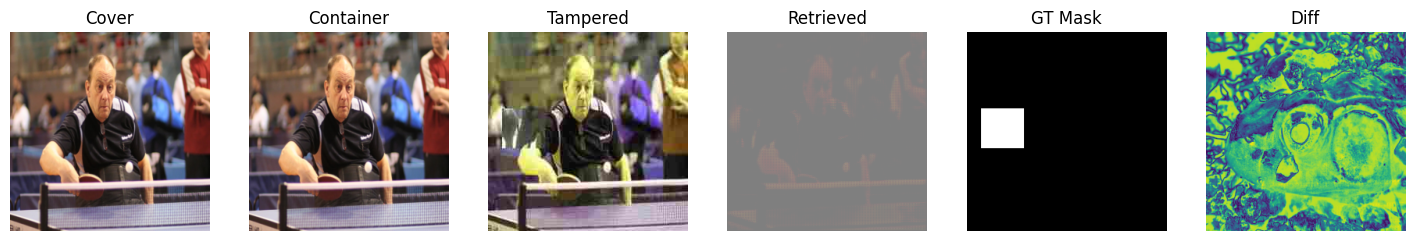

Done.


In [ ]:
idx = 0
cover_np = imgs[idx].detach().cpu().permute(1,2,0).numpy()
cont_np  = cont[idx].detach().cpu().permute(1,2,0).numpy()
tam_np   = tam[idx].detach().cpu().permute(1,2,0).numpy()
ret_np   = ret[idx].detach().cpu().permute(1,2,0).numpy()
mask_np  = mask[idx,0].detach().cpu().numpy()
diff_np  = np.mean(np.abs(ret_np - secrets[idx].detach().cpu().permute(1,2,0).numpy()), axis=2)

fig, ax = plt.subplots(1,6, figsize=(18,4))
titles = ["Cover","Container","Tampered","Retrieved","GT Mask","Diff"]
images = [cover_np, cont_np, tam_np, ret_np, mask_np, diff_np]
for i in range(6):
    if i==4:
        ax[i].imshow(images[i], cmap="gray")
    else:
        ax[i].imshow(images[i])
    ax[i].set_title(titles[i])
    ax[i].axis("off")

plt.show()
print("Done.")